In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import rasterio as rio
import earthpy as et
import earthpy.plot as ep
import fiona
%matplotlib inline

MCD43A3_wsa_greenland_mosaic_2019032_wgs84_5922.tif
MCD43A3_wsa_greenland_mosaic_2019017_wgs84_5922.tif
MCD43A3_wsa_greenland_mosaic_2019021_wgs84_5922.tif
MCD43A3_wsa_greenland_mosaic_2019034_wgs84_5922.tif
MCD43A3_wsa_greenland_mosaic_2019022_wgs84_5922.tif
MCD43A3_wsa_greenland_mosaic_2019033_wgs84_5922.tif
MCD43A3_wsa_greenland_mosaic_2019029_wgs84_5922.tif
MCD43A3_wsa_greenland_mosaic_2019040_wgs84_5922.tif


KeyboardInterrupt: 

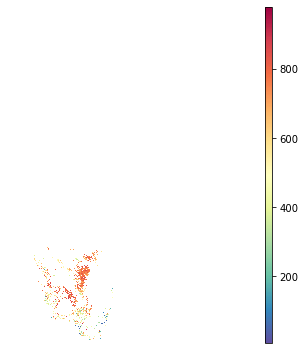

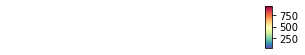

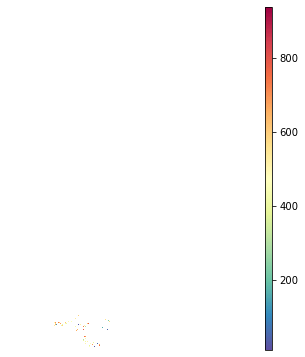

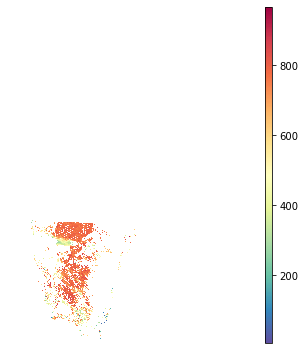

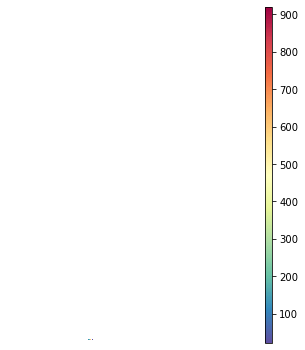

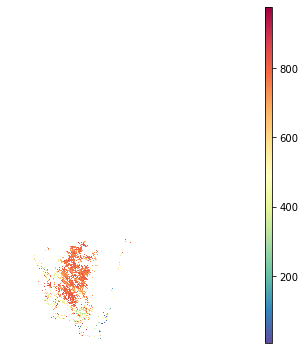

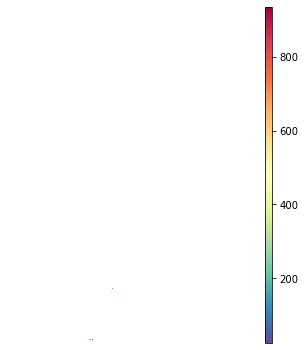

In [30]:
os.chdir('/media/arthur/linux_data/')
map_export_path = '/media/arthur/linux_data/map_exports'
mcd_data_path = ('/media/arthur/linux_data/greenland_actual_albedo_qa_lite_epsg_5922/'
                 'MCD43A3_wsa_greenland_mosaic_2019044_wgs84_5922.tif')

with fiona.open('/home/arthur/Dropbox/projects/greenland/vector_basedata/'
                'greenland_epsg5922.shp') as greenland_shp:
    shapes = [feature['geometry'] for feature in greenland_shp]
    
for root, dirs, files in os.walk((os.path.dirname(mcd_data_path))):
    for file in files:
        print(file)
        with rio.open(os.path.join(root,file)) as mcd_tif:
            out_img, out_transform = rio.mask.mask(mcd_tif, shapes, crop=True)
            out_meta = mcd_tif.meta
    
        out_meta.update({'driver': 'GTiff',
                        'height': out_img.shape[1],
                        'width': out_img.shape[2],
                        'transform': out_transform})
        lut_img = out_img[0, :, :]
        lut_img = np.ma.masked_where(lut_img==32767, lut_img)
        fig, ax = plt.subplots(figsize=(4.75, 8.25))
        ep.plot_bands(lut_img,
                      ax=ax,
                      cmap='Spectral_r',
                     )
        ax.set_axis_off()
        plt.savefig(os.path.join(map_export_path, file))



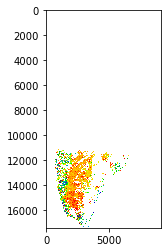

In [7]:
lut_img = out_img[0, :, :]
lut_img = np.ma.masked_where(lut_img==32767, lut_img)
plt.imshow(lut_img, cmap='nipy_spectral')

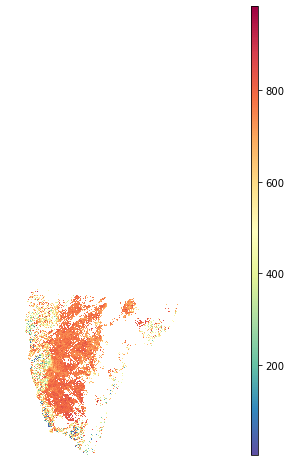

In [8]:
fig, ax = plt.subplots(figsize=(4.75, 8.25))
ep.plot_bands(lut_img,
              ax=ax,
              cmap='Spectral_r',
             )

ax.set_axis_off()

plt.show()

